<a href="https://colab.research.google.com/github/shreyansh273/GTx_6501/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [2]:
uploaded = files.upload()

Saving uscrime.txt to uscrime.txt


In [3]:
uploaded = files.upload()

Saving temps.txt to temps.txt


In [4]:
!ls

iris.txt  sample_data  temps.txt  uscrime.txt


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [57]:
crime = pd.read_csv("uscrime.txt", sep='\t')
iris = pd.read_csv("iris.csv")

In [28]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
from sklearn.cluster import KMeans

In [31]:
X = iris.drop("variety", axis=1)
y = iris["variety"]

In [43]:
error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=52)
  kmeans.fit(X)
  error.append(kmeans.inertia_)

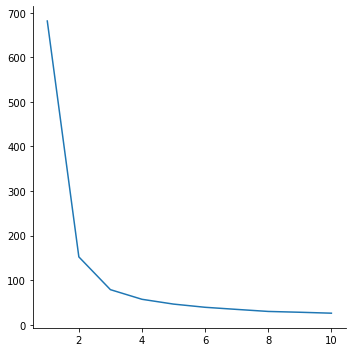

In [46]:
sns.relplot(y=error, kind='line', x=range(1,11))

In [49]:
error = []
labels = []
for i in range(1, 100):
  kmeans = KMeans(n_clusters=4, random_state=52)
  kmeans.fit(X)
  labels.append(kmeans.labels_)
  error.append(kmeans.inertia_)

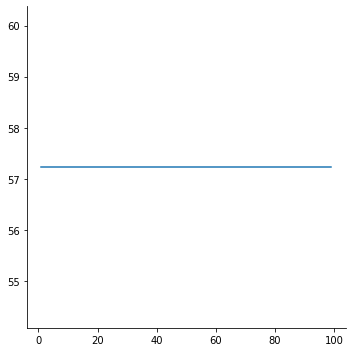

In [50]:
sns.relplot(x=range(1,100), y=error, kind='line')

In [54]:
crime.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [55]:
crime.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


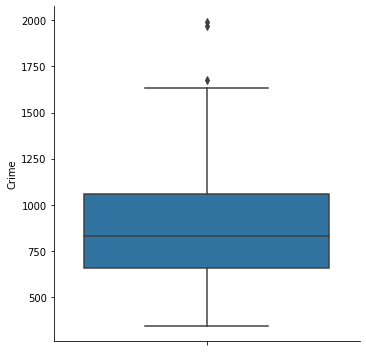

In [56]:
sns.catplot(y="Crime", data=crime, kind='box')

In [118]:
temp = pd.read_csv('temps.txt', sep='\t')

In [58]:
temp.head()

,DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1-Jul,98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85
1,2-Jul,97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87
2,3-Jul,97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79
3,4-Jul,90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85
4,5-Jul,89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84


In [119]:
mean = temp['1996'].mean()
cols = temp.columns[1:len(temp.columns)]
for i in range(len(cols)):
  for j in range(len(temp)):
    if j==0:
      temp.loc[j, 'X_'+cols[i]] = mean - temp.loc[j, cols[i]]
      temp.loc[j, 'S_'+cols[i]] = np.where(temp.loc[j, 'X_'+cols[i]] <0,0, temp.loc[j, 'X_'+cols[i]] )

    else:
      temp.loc[j, 'X_'+cols[i]] = mean - temp.loc[j, cols[i]]
      temp.loc[j, 'S_'+cols[i]] = np.where((temp.loc[j-1, 'S_'+cols[i]] + temp.loc[j, 'X_'+cols[i]] )<0,0, (temp.loc[j-1, 'S_'+cols[i]] + temp.loc[j, 'X_'+cols[i]] ))

In [106]:
temp.head()

,DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,X_1996,S_1996,X_1997,S_1997,X_1998,S_1998,X_1999,S_1999,X_2000,S_2000,X_2001,S_2001,X_2002,S_2002,X_2003,S_2003,X_2004,S_2004,X_2005,S_2005,X_2006,S_2006,X_2007,S_2007,X_2008,S_2008,X_2009,S_2009,X_2010,S_2010,X_2011,S_2011,X_2012,S_2012,X_2013,S_2013,X_2014,S_2014,X_2015,S_2015
0,1-Jul,98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85,-14.284553,-14.284553,-4.325203,-4.325203,-6.739837,-6.739837,-0.642276,-0.642276,-4.96748,-4.96748,-2.447154,-2.447154,-6.414634,-6.414634,8.479675,0.0,-0.235772,-0.235772,-7.642276,-7.642276,-9.95122,-9.95122,-9.601626,-9.601626,-2.487805,-2.487805,-14.00813,-14.00813,0.211382,0.0,-6.723577,-6.723577,-20.349593,-20.349593,-0.333333,-0.333333,-6.056911,-6.056911,-1.699187,-1.699187
1,2-Jul,97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87,-13.284553,0.000000,-8.325203,0.000000,-3.739837,0.000000,1.357724,0.000000,-6.96748,0.00000,-5.447154,0.000000,-6.414634,0.000000,0.479675,0.0,0.764228,0.000000,-5.642276,0.000000,-9.95122,0.00000,0.398374,0.000000,-4.487805,0.000000,-9.00813,0.00000,3.211382,0.0,-8.723577,0.000000,-8.349593,0.000000,-3.333333,0.000000,-9.056911,0.000000,-3.699187,0.000000
2,3-Jul,97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79,-13.284553,0.000000,-11.325203,0.000000,-6.739837,0.000000,-3.642276,0.000000,-8.96748,0.00000,-5.447154,0.000000,-3.414634,0.000000,-5.520325,0.0,-4.235772,0.000000,-2.642276,0.000000,-9.95122,0.00000,3.398374,0.000000,-8.487805,0.000000,-8.00813,0.00000,4.211382,0.0,-9.723577,0.000000,-14.349593,0.000000,5.666667,0.000000,-3.056911,0.000000,4.300813,0.000000
3,4-Jul,90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85,-6.284553,0.000000,-9.325203,0.000000,-6.739837,0.000000,-4.642276,0.000000,-10.96748,0.00000,-2.447154,0.000000,-5.414634,0.000000,-4.520325,0.0,-6.235772,0.000000,-2.642276,0.000000,-7.95122,0.00000,-0.601626,0.000000,-7.487805,0.000000,-10.00813,0.00000,2.211382,0.0,-6.723577,0.000000,-13.349593,0.000000,4.666667,0.000000,-0.056911,0.000000,-1.699187,0.000000
4,5-Jul,89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84,-5.284553,0.000000,-2.325203,0.000000,-6.739837,0.000000,-6.642276,0.000000,-11.96748,0.00000,-4.447154,0.000000,-9.414634,0.000000,1.479675,0.0,-8.235772,0.000000,-5.642276,0.000000,-6.95122,0.00000,-2.601626,0.000000,-5.487805,0.000000,0.99187,0.00000,-0.788618,0.0,-4.723577,0.000000,-15.349593,0.000000,-1.333333,0.000000,-2.056911,0.000000,-0.699187,0.000000


In [120]:
temp[['DAY','1996','X_1996','S_1996']]

,DAY,1996,X_1996,S_1996
0,1-Jul,98,-14.284553,0.000000
1,2-Jul,97,-13.284553,0.000000
2,3-Jul,97,-13.284553,0.000000
3,4-Jul,90,-6.284553,0.000000
4,5-Jul,89,-5.284553,0.000000
...,...,...,...,...
118,27-Oct,75,8.715447,379.195122
119,28-Oct,81,2.715447,381.910569
120,29-Oct,82,1.715447,383.626016
121,30-Oct,82,1.715447,385.341463


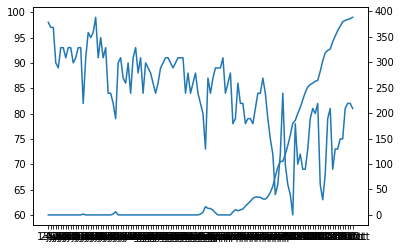

In [125]:
fig,ax=plt.subplots()
ax.plot(temp['DAY'], temp['1996'])
ax2 = ax.twinx()
ax2.plot(temp['DAY'], temp['S_1996'])
plt.show()

In [82]:
len(temp)

123